<a id="1"></a>
# <p style="background-color:#FF69B4;font-family:newtimeroman;color:black;font-size:150%;text-align:center;border-radius:10px 10px;">📚 IMPORTING LIBRARIES</p>

In [86]:
import pandas as pd
import numpy as np
import imblearn
import random
from catboost import CatBoostClassifier
import seaborn as sns
import matplotlib.pyplot as plt

<a id="2"></a>

<p style="background-color:#FF69B4;font-family:newtimeroman;color:black;font-size:170%;text-align:center;border-radius:10px 10px;">📖 LOADING DATA</p>

In [87]:
data=pd.read_csv("/kaggle/input/imbalance/train.csv")
data.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


<a id="3"></a>

<p style="background-color:#FF69B4;font-family:newtimeroman;color:black;font-size:170%;text-align:center;border-radius:10px 10px;"> Data Overview</p>

In [88]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,595202,595203,595204,595205,595206,595207,595208,595209,595210,595211
id,7.000000,9.000000,13.000000,16.000000,17.000000,19.000000,20.000000,22.000000,26.000000,28.000000,...,1.488001e+06,1.488005e+06,1.488008e+06,1.488009e+06,1.488011e+06,1.488013e+06,1.488016e+06,1.488017e+06,1.488021e+06,1.488027e+06
target,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
ps_ind_01,2.000000,1.000000,5.000000,0.000000,0.000000,5.000000,2.000000,5.000000,5.000000,1.000000,...,4.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,5.000000e+00,1.000000e+00,5.000000e+00,0.000000e+00
ps_ind_02_cat,2.000000,1.000000,4.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00
ps_ind_03,5.000000,7.000000,9.000000,2.000000,0.000000,4.000000,3.000000,4.000000,3.000000,2.000000,...,3.000000e+00,3.000000e+00,2.000000e+00,6.000000e+00,2.000000e+00,1.000000e+01,3.000000e+00,1.000000e+01,3.000000e+00,8.000000e+00
ps_ind_04_cat,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
ps_ind_05_cat,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
ps_ind_06_bin,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
ps_ind_07_bin,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
ps_ind_08_bin,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [90]:
data.nunique()

id                595212
target                 2
ps_ind_01              8
ps_ind_02_cat          5
ps_ind_03             12
ps_ind_04_cat          3
ps_ind_05_cat          8
ps_ind_06_bin          2
ps_ind_07_bin          2
ps_ind_08_bin          2
ps_ind_09_bin          2
ps_ind_10_bin          2
ps_ind_11_bin          2
ps_ind_12_bin          2
ps_ind_13_bin          2
ps_ind_14              5
ps_ind_15             14
ps_ind_16_bin          2
ps_ind_17_bin          2
ps_ind_18_bin          2
ps_reg_01             10
ps_reg_02             19
ps_reg_03           5013
ps_car_01_cat         13
ps_car_02_cat          3
ps_car_03_cat          3
ps_car_04_cat         10
ps_car_05_cat          3
ps_car_06_cat         18
ps_car_07_cat          3
ps_car_08_cat          2
ps_car_09_cat          6
ps_car_10_cat          3
ps_car_11_cat        104
ps_car_11              5
ps_car_12            184
ps_car_13          70482
ps_car_14            850
ps_car_15             15
ps_calc_01            10


In [91]:
data.shape

(595212, 59)

In [92]:
data.duplicated().value_counts()

False    595212
Name: count, dtype: int64

In [93]:
data.isnull().any()

id                False
target            False
ps_ind_01         False
ps_ind_02_cat     False
ps_ind_03         False
ps_ind_04_cat     False
ps_ind_05_cat     False
ps_ind_06_bin     False
ps_ind_07_bin     False
ps_ind_08_bin     False
ps_ind_09_bin     False
ps_ind_10_bin     False
ps_ind_11_bin     False
ps_ind_12_bin     False
ps_ind_13_bin     False
ps_ind_14         False
ps_ind_15         False
ps_ind_16_bin     False
ps_ind_17_bin     False
ps_ind_18_bin     False
ps_reg_01         False
ps_reg_02         False
ps_reg_03         False
ps_car_01_cat     False
ps_car_02_cat     False
ps_car_03_cat     False
ps_car_04_cat     False
ps_car_05_cat     False
ps_car_06_cat     False
ps_car_07_cat     False
ps_car_08_cat     False
ps_car_09_cat     False
ps_car_10_cat     False
ps_car_11_cat     False
ps_car_11         False
ps_car_12         False
ps_car_13         False
ps_car_14         False
ps_car_15         False
ps_calc_01        False
ps_calc_02        False
ps_calc_03      

In [94]:
data.isnull().sum().sort_values(ascending = False)[:].reset_index()

,index,0
0,id,0
1,ps_calc_06,0
2,ps_car_10_cat,0
3,ps_car_11_cat,0
4,ps_car_11,0
5,ps_car_12,0
6,ps_car_13,0
7,ps_car_14,0
8,ps_car_15,0
9,ps_calc_01,0


<div class="alert alert-block alert-info ;"> 📌  We do not have any null or missing data 🥳 </div>

In [95]:
data.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


Markdown
<a id="4"></a>
# <p style="background-color:#FF69B4;font-family:newtimeroman;color:black;font-size:170%;text-align:center;border-radius:10px 10px;">📊 EDA</p>


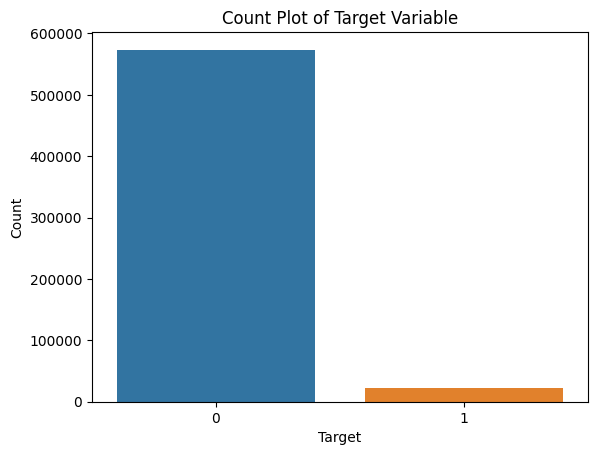

In [96]:

# Assuming 'data' is your DataFrame
sns.countplot(x='target', data=data)

# Optionally, you can add labels and a title to the plot
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Count Plot of Target Variable')
plt.show()


Markdown
<a id="4"></a>
# <p style="background-color:#FF69B4;font-family:newtimeroman;color:black;font-size:170%;text-align:center;border-radius:10px 10px;">Preprocessing </p>

In [97]:
data.groupby('target')['id'].count() / len(data)

target
0    0.963552
1    0.036448
Name: id, dtype: float64

In [98]:
data.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [99]:
np.unique(data['target'], return_counts=True)

(array([0, 1]), array([573518,  21694]))

In [100]:
21694/573518

0.037826188541597645

In [101]:

# frac specifies the fraction of rows to sample (0.01 = 10%)
random_10_percent = data.sample(frac=0.01, random_state=42)

# Now, 'random_10_percent' contains a random 10% subset of your original dataset

In [103]:
np.unique(random_10_percent['target'], return_counts=True)

(array([0, 1]), array([5731,  221]))

In [104]:
221/5731

0.03856220554876985

In [105]:
!pip install pyod

In [106]:
from pyod.models import abod

In [107]:
abod_od = abod.ABOD(n_neighbors=20, contamination=0.04)

<a id="6"></a>
# <p style="background-color:#FF69B4;font-family:newtimeroman;color:black;font-size:170%;text-align:center;border-radius:10px 10px;">✂️ SPLITING DATA</p>

In [108]:
X = random_10_percent.drop('target', axis=1)
y_pred = abod_od.fit_predict(X)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


<a id="8"></a>
# <p style="background-color:#FF69B4;font-family:newtimeroman;color:#black;font-size:150%;text-align:center;border-radius:10px 10px;">💡 MODELS</p>

In [109]:
np.unique(y_pred, return_counts=True)

(array([0, 1]), array([5713,  239]))

In [110]:
from sklearn import metrics

In [111]:
y_true = random_10_percent['target']

In [112]:
print(metrics.classification_report(y_true=y_true, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      5731
           1       0.05      0.05      0.05       221

    accuracy                           0.93      5952
   macro avg       0.51      0.51      0.51      5952
weighted avg       0.93      0.93      0.93      5952



In [113]:
abod_od = abod.ABOD(n_neighbors=20, contamination=0.08)
y_pred = abod_od.fit_predict(X)
print(metrics.classification_report(y_true=y_true, y_pred=y_pred))

/opt/conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.96      0.92      0.94      5731
           1       0.05      0.10      0.07       221

    accuracy                           0.89      5952
   macro avg       0.51      0.51      0.50      5952
weighted avg       0.93      0.89      0.91      5952



In [114]:
from sklearn.ensemble import IsolationForest

In [115]:
IF = IsolationForest(contamination=0.005)
y_pred = IF.fit_predict(X)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [116]:
np.unique(y_pred, return_counts=True)

(array([-1,  1]), array([  30, 5922]))

In [117]:
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

In [35]:
print(metrics.classification_report(y_true=y_true, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     57302
           1       0.09      0.01      0.02      2219

    accuracy                           0.96     59521
   macro avg       0.53      0.50      0.50     59521
weighted avg       0.93      0.96      0.94     59521



In [118]:
from sklearn.neighbors import LocalOutlierFactor

In [119]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.04, n_jobs=-1)

In [120]:
y_pred = lof.fit_predict(X)

In [121]:
np.unique(y_pred, return_counts=True)

(array([-1,  1]), array([ 239, 5713]))

In [122]:
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

In [123]:
np.unique(y_pred, return_counts=True)

(array([0, 1]), array([5713,  239]))

In [124]:
y_true = random_10_percent['target']

In [125]:
print(metrics.classification_report(y_true=y_true, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      5731
           1       0.02      0.02      0.02       221

    accuracy                           0.92      5952
   macro avg       0.49      0.49      0.49      5952
weighted avg       0.93      0.92      0.93      5952



In [126]:
X = random_10_percent.iloc[:, 2:]
X.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
256886,4,1,5,1,0,1,0,0,0,0,...,7,3,2,3,0,1,0,1,0,0
118785,6,2,10,1,0,0,0,0,1,0,...,6,3,3,5,0,1,1,0,0,0
56083,4,1,9,1,0,0,0,1,0,0,...,3,1,0,7,0,0,1,0,0,0
542002,0,1,7,1,4,0,1,0,0,0,...,1,1,3,6,1,1,0,0,0,0
349518,1,1,3,1,0,1,0,0,0,0,...,6,1,5,6,0,1,0,0,0,0


In [127]:
y = random_10_percent['target']

In [128]:
cat_col = [i for i in range(0, len(X.columns)) if 'cat' in X.columns[i]]
cat_col

[1, 3, 4, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]

In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [130]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

In [131]:
np.shape(X_rus)

(336, 57)

In [132]:
np.unique(y_rus, return_counts=True)

(array([0, 1]), array([168, 168]))

In [133]:
# Create and train the CatBoostClassifier model
catboost_model = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, random_state=42)


In [79]:
#model = CatBoostClassifier(iterations=300, learning_rate=0.1, depth=6, eval_metric='Accuracy', verbose=10, task_type='GPU')

In [134]:
# Fit the model on the RUS training data
catboost_model.fit(X_rus, y_rus)

0:	learn: 0.6759894	total: 3.74ms	remaining: 1.87s
1:	learn: 0.6646378	total: 6.65ms	remaining: 1.66s
2:	learn: 0.6536929	total: 8.39ms	remaining: 1.39s
3:	learn: 0.6367894	total: 10.7ms	remaining: 1.32s
4:	learn: 0.6260681	total: 12.8ms	remaining: 1.27s
5:	learn: 0.6076409	total: 14.7ms	remaining: 1.21s
6:	learn: 0.5974088	total: 16.4ms	remaining: 1.15s
7:	learn: 0.5838000	total: 18.3ms	remaining: 1.13s
8:	learn: 0.5750577	total: 20.3ms	remaining: 1.11s
9:	learn: 0.5643325	total: 22ms	remaining: 1.08s
10:	learn: 0.5527119	total: 23.8ms	remaining: 1.06s
11:	learn: 0.5352884	total: 25.5ms	remaining: 1.04s
12:	learn: 0.5189686	total: 27.3ms	remaining: 1.02s
13:	learn: 0.5101550	total: 29.3ms	remaining: 1.02s
14:	learn: 0.4990345	total: 31ms	remaining: 1s
15:	learn: 0.4936310	total: 32.8ms	remaining: 991ms
16:	learn: 0.4854195	total: 34.4ms	remaining: 979ms
17:	learn: 0.4789798	total: 36.2ms	remaining: 970ms
18:	learn: 0.4684287	total: 38ms	remaining: 963ms
19:	learn: 0.4630349	total: 39.

In [135]:
 #Evaluate the model on the test data
accuracy = catboost_model.score(X_test, y_test)

In [136]:
print("Accuracy on Test Data:", accuracy)

Accuracy on Test Data: 0.5315860215053764
